# Flight Price Prediction

Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

# Target Column

Price: The price of the ticket

# Importing Libraries

In [1138]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import re
from sklearn.metrics import classification_report
from scipy.stats import skew
from sklearn.preprocessing import power_transform
from sklearn import metrics
from sklearn.impute import SimpleImputer
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,mean_squared_error as mse,roc_curve,precision_recall_curve,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score
from math import sqrt

import statistics
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings("ignore")

## importing data

In [1139]:
tr=pd.read_excel('Data_Train.xlsx')
ts=pd.read_excel('Test_set.xlsx')
tr.shape,ts.shape

((10683, 11), (2671, 10))

In [1140]:
tr.head().T

,0,1,2,3,4
Airline,IndiGo,Air India,Jet Airways,IndiGo,IndiGo
Date_of_Journey,24/03/2019,1/05/2019,9/06/2019,12/05/2019,01/03/2019
Source,Banglore,Kolkata,Delhi,Kolkata,Banglore
Destination,New Delhi,Banglore,Cochin,Banglore,New Delhi
Route,BLR → DEL,CCU → IXR → BBI → BLR,DEL → LKO → BOM → COK,CCU → NAG → BLR,BLR → NAG → DEL
Dep_Time,22:20,05:50,09:25,18:05,16:50
Arrival_Time,01:10 22 Mar,13:15,04:25 10 Jun,23:30,21:35
Duration,2h 50m,7h 25m,19h,5h 25m,4h 45m
Total_Stops,non-stop,2 stops,2 stops,1 stop,1 stop
Additional_Info,No info,No info,No info,No info,No info


In [1141]:
ts.head().T

,0,1,2,3,4
Airline,Jet Airways,IndiGo,Jet Airways,Multiple carriers,Air Asia
Date_of_Journey,6/06/2019,12/05/2019,21/05/2019,21/05/2019,24/06/2019
Source,Delhi,Kolkata,Delhi,Delhi,Banglore
Destination,Cochin,Banglore,Cochin,Cochin,Delhi
Route,DEL → BOM → COK,CCU → MAA → BLR,DEL → BOM → COK,DEL → BOM → COK,BLR → DEL
Dep_Time,17:30,06:20,19:15,08:00,23:55
Arrival_Time,04:25 07 Jun,10:20,19:00 22 May,21:00,02:45 25 Jun
Duration,10h 55m,4h,23h 45m,13h,2h 50m
Total_Stops,1 stop,1 stop,1 stop,1 stop,non-stop
Additional_Info,No info,No info,In-flight meal not included,No info,No info


data seems to have maximum object columns

In [1142]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [1143]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


All input variables are Object and training data seems to have null values

In [1144]:
tr.isnull().values.sum(),ts.isnull().values.sum()

(2, 0)

In [1145]:
tr.dropna(inplace=True)

There are 2 null values present in train dataset so we drop those rows

In [1146]:
tr[tr.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [1147]:
ts[ts.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
294,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,No info
794,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,In-flight meal not included
909,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,20:00,22:55,2h 55m,non-stop,No info
974,Air India,12/06/2019,Kolkata,Banglore,CCU → DEL → AMD → BLR,07:00,05:25 13 Jun,22h 25m,2 stops,No info
1011,Jet Airways,9/05/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 10 May,22h 55m,2 stops,No info
1033,Multiple carriers,15/05/2019,Delhi,Cochin,DEL → BOM → COK,07:30,19:15,11h 45m,1 stop,No info
1044,GoAir,24/03/2019,Banglore,New Delhi,BLR → DEL,20:55,23:50,2h 55m,non-stop,No info
1233,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,No info
1504,Air India,15/06/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 16 Jun,21h 15m,2 stops,No info
1537,Jet Airways,6/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,06:45,04:25 07 Jun,21h 40m,2 stops,In-flight meal not included


In [1148]:
tr.drop_duplicates(keep='first',inplace=True)
ts.drop_duplicates(keep='first',inplace=True)

There are duplicated values present in dataset, removing those values

In [1149]:
tr["Additional_Info"].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

As per the above chart we can see that there are some similar repeated information 'No info' and 'No Info' we can try fixing it 

In [1150]:
tr["Additional_Info"] = tr["Additional_Info"].replace({'No Info': 'No info'})

tr['Duration']=  tr['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
ts['Duration']=  ts['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

tr["Journey_day"] = tr['Date_of_Journey'].str.split('/').str[0].astype(int)
tr["Journey_month"] = tr['Date_of_Journey'].str.split('/').str[1].astype(int)

tr.drop(["Date_of_Journey"], axis = 1, inplace = True)
tr["Dep_hour"] = pd.to_datetime(tr["Dep_Time"]).dt.hour
tr["Dep_min"] = pd.to_datetime(tr["Dep_Time"]).dt.minute
tr.drop(["Dep_Time"], axis = 1, inplace = True)
tr["Arrival_hour"] = pd.to_datetime(tr.Arrival_Time).dt.hour
tr["Arrival_min"] = pd.to_datetime(tr.Arrival_Time).dt.minute
tr.drop(["Arrival_Time"], axis = 1, inplace = True)

ts["Journey_day"] = ts['Date_of_Journey'].str.split('/').str[0].astype(int)
ts["Journey_month"] = ts['Date_of_Journey'].str.split('/').str[1].astype(int)
ts.drop(["Date_of_Journey"], axis = 1, inplace = True)
ts["Dep_hour"] = pd.to_datetime(ts["Dep_Time"]).dt.hour
ts["Dep_min"] = pd.to_datetime(ts["Dep_Time"]).dt.minute
ts.drop(["Dep_Time"], axis = 1, inplace = True)
ts["Arrival_hour"] = pd.to_datetime(ts.Arrival_Time).dt.hour
ts["Arrival_min"] = pd.to_datetime(ts.Arrival_Time).dt.minute
ts.drop(["Arrival_Time"], axis = 1, inplace = True)

data cleaning is performed and most of features are extracted from original ones

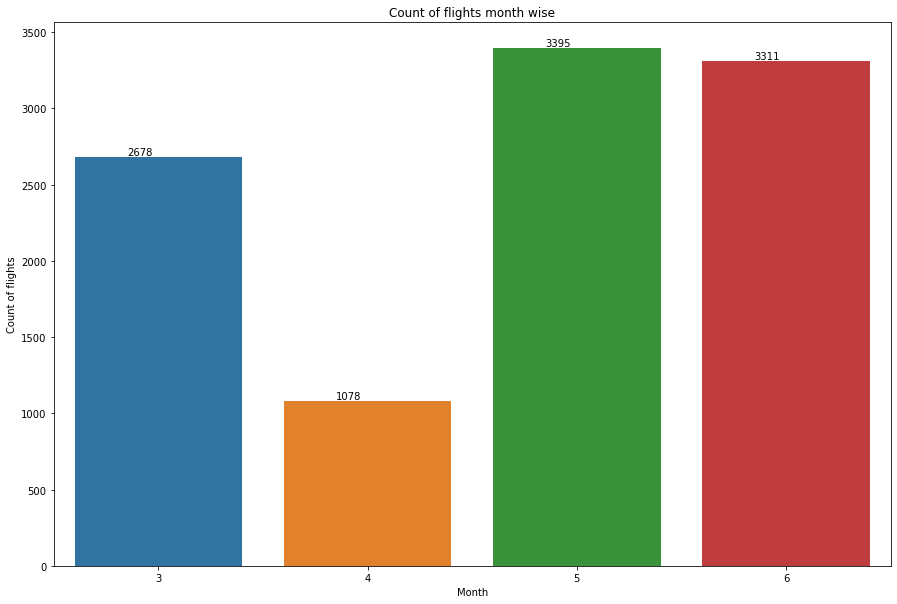

In [1151]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = tr)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

The above visualization shows the monthwise counts of flights

In [1152]:
tr['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)
ts['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)

Replacing the values of Total_Stops column with numbers

In [1153]:
tr["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

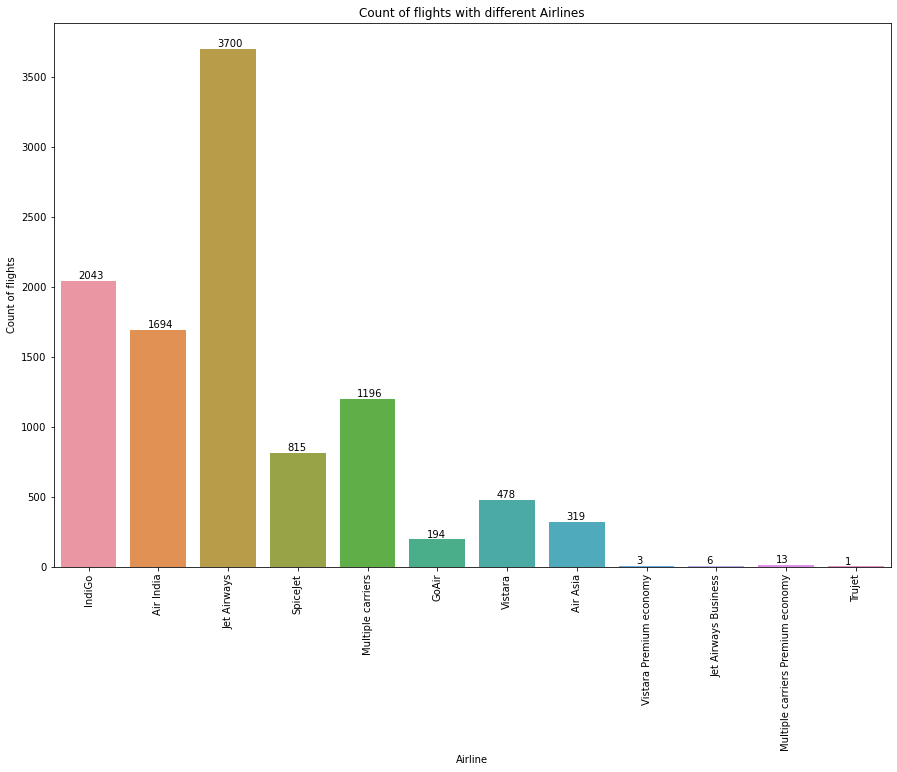

In [1154]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =tr)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

The above visualization shows the count of flights with different airlines

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

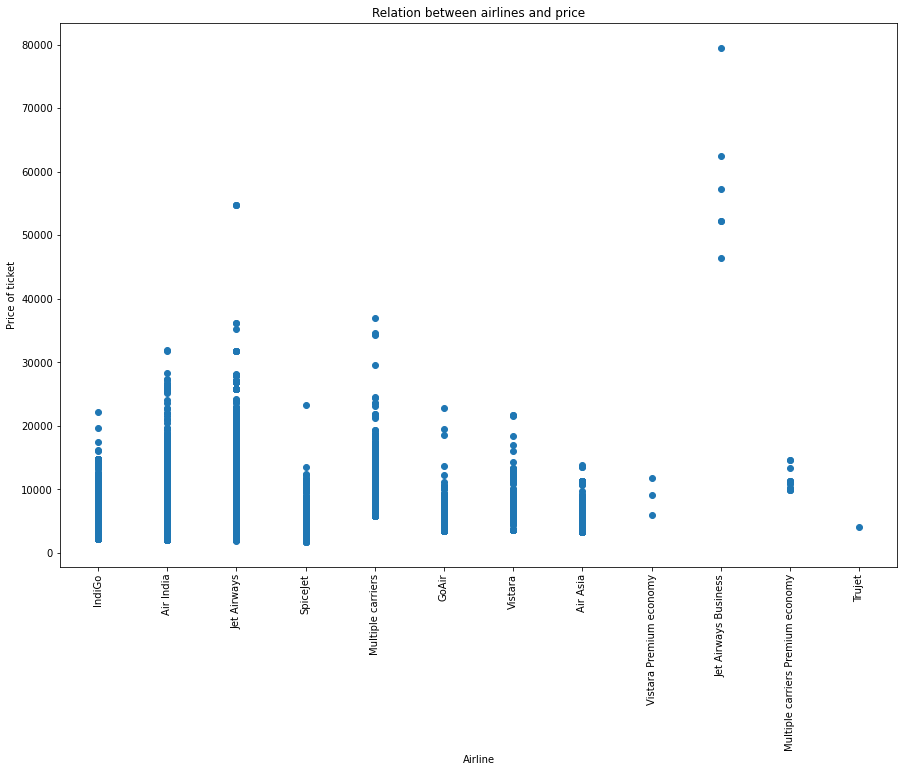

In [1155]:
plt.figure(figsize = (15, 10))
plt.title('Relation between airlines and price')
plt.scatter(tr['Airline'], tr['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

The above visualization shows the relation between price column and airlines columns

In [1156]:

tr["Airline"].replace({'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'
                                                   },    
                                        inplace=True)

ts["Airline"].replace({'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'
                                                   },    
                                        inplace=True)


replacing Multiple carriers Premium economy,Jet Airways Business,Vistara Premium economy and Trujet with Other as they doest bring much impact to our data

Text(0, 0.5, 'Price of ticket')

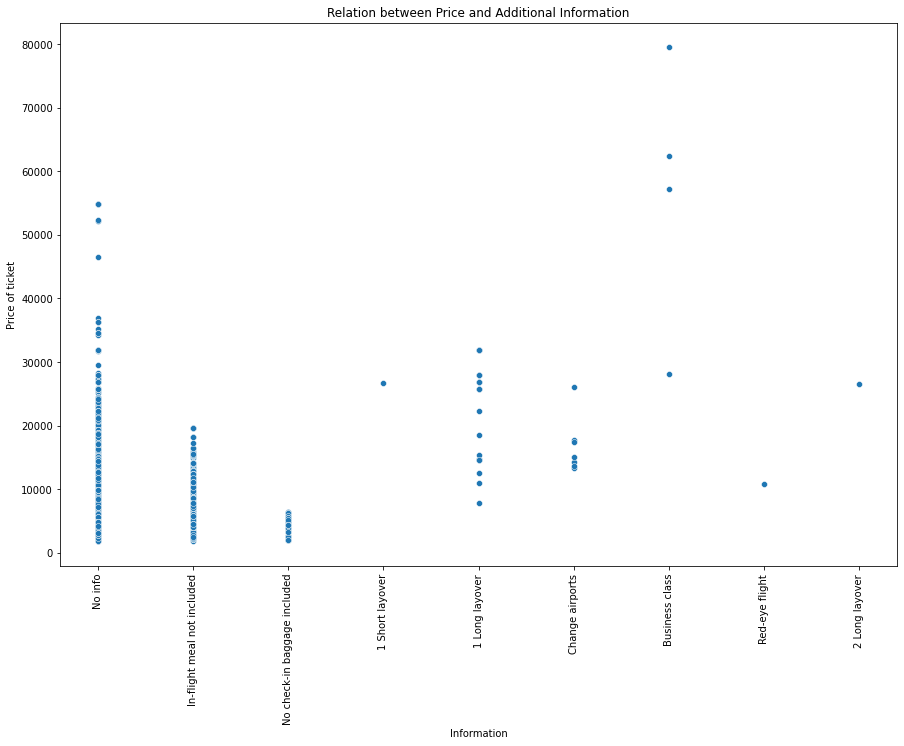

In [1157]:
plt.figure(figsize = (15, 10))
plt.title('Relation between Price and Additional Information')
sns.scatterplot(tr['Additional_Info'], tr['Price'],data=tr)
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')

The above visualization shows relation between Additional information column and Ticket prices

In [1158]:
tr["Additional_Info"].value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [1159]:
tr["Additional_Info"].replace({'Change airports':'Other', 
                                                        'Business class':'Other',
                                                        '1 Short layover':'Other',
                                                        'Red-eye flight':'Other',
                                                        '2 Long layover':'Other',   
                                                   },    
                                        inplace=True)
ts["Additional_Info"].replace({'Change airports':'Other', 
                                                        'Business class':'Other',
                                                        '1 Short layover':'Other',
                                                        'Red-eye flight':'Other',
                                                        '2 Long layover':'Other',   
                                                   },    
                                        inplace=True)

Replacing Change airports, Business class,1 Short layover,Red-eye flight and 2 Long layover with Other

In [1160]:
tr.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,1,3,16,50,21,35


# Looking for Outliers

<AxesSubplot:>

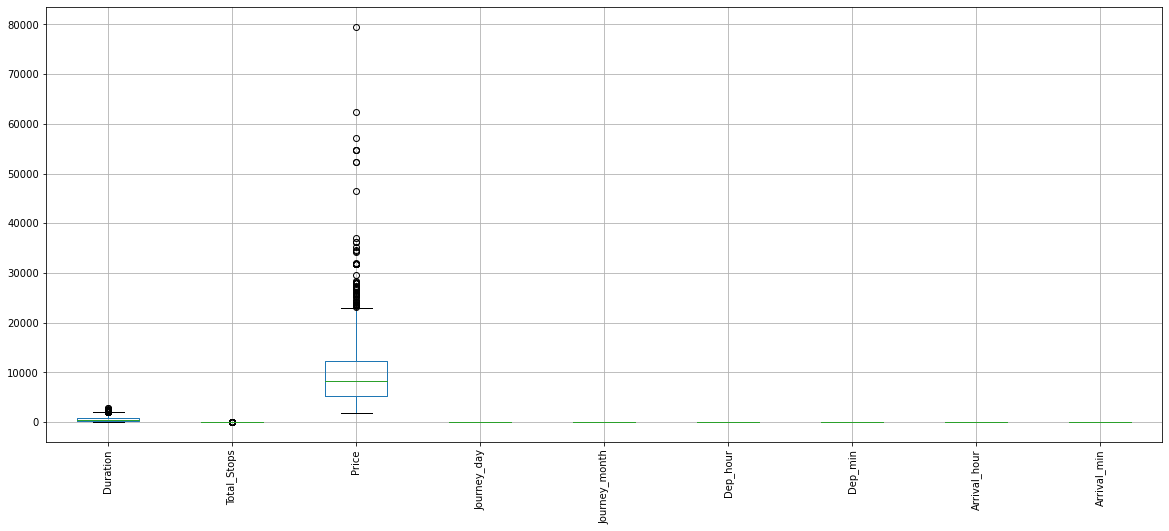

In [1161]:
tr.boxplot( rot = 90, figsize=(20,8))

<AxesSubplot:>

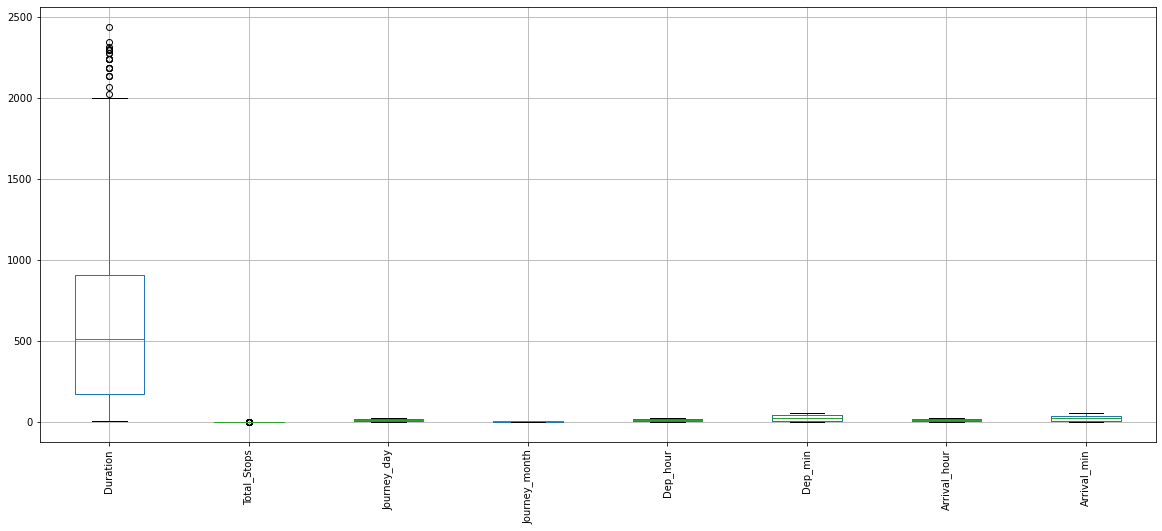

In [1162]:
ts.boxplot( rot = 90, figsize=(20,8))

We are not performing outliers removal as it removes a lot of data form dataset

In [1163]:
from scipy.stats import iqr
iqr(tr['Duration'],axis=0)


740.0

In [1164]:
temp=tr.drop(["Price"], axis=1)

In [1165]:
tr_categorical= temp.select_dtypes(exclude=['int64', 'float','int32'])
tr_numerical= temp.select_dtypes(include=['int64', 'float','int32'])

ts_categorical= ts.select_dtypes(exclude=['int64', 'float','int32','int32'])
ts_numerical= ts.select_dtypes(include=['int64', 'float','int32'])


dividing data in numerical and categorical columns

In [1166]:
ts_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2645 entries, 0 to 2670
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2645 non-null   object
 1   Source           2645 non-null   object
 2   Destination      2645 non-null   object
 3   Route            2645 non-null   object
 4   Additional_Info  2645 non-null   object
dtypes: object(5)
memory usage: 124.0+ KB


In [1167]:

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
tr_categorical['Airline']= label_encoder.fit_transform(tr_categorical['Airline'])
tr_categorical['Source']= label_encoder.fit_transform(tr_categorical['Source'])
tr_categorical['Destination']= label_encoder.fit_transform(tr_categorical['Destination'])
tr_categorical['Route']= label_encoder.fit_transform(tr_categorical['Route'])
tr_categorical['Additional_Info']= label_encoder.fit_transform(tr_categorical['Additional_Info'])

ts_categorical['Airline']= label_encoder.fit_transform(ts_categorical['Airline'])
ts_categorical['Source']= label_encoder.fit_transform(ts_categorical['Source'])
ts_categorical['Destination']= label_encoder.fit_transform(ts_categorical['Destination'])
ts_categorical['Route']= label_encoder.fit_transform(ts_categorical['Route'])
ts_categorical['Additional_Info']= label_encoder.fit_transform(ts_categorical['Additional_Info'])


performing label encoding to convert categorical data in numerical columns

In [1168]:
tr_categorical.head()

,Airline,Source,Destination,Route,Additional_Info
0,3,0,5,18,3
1,1,3,0,84,3
2,4,2,1,118,3
3,3,3,0,91,3
4,3,0,5,29,3


In [1169]:
x = pd.concat([tr_categorical, tr_numerical], axis=1)
y=tr['Price']
test=pd.concat([ts_categorical, ts_numerical], axis=1)
from sklearn.preprocessing import StandardScaler 

x = StandardScaler().fit_transform(x)
test = StandardScaler().fit_transform(test)


Getting x, y and test data ready for performing ML

In [1170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=45)


def met(y_act, y_pred):
    return(1-(np.sqrt(np.mean((np.log10(y_act) - np.log10(y_pred))**2))))

from sklearn.metrics import make_scorer
my_met= make_scorer(met, greater_is_better=False)
models = []
models.append(('xgr', XGBRegressor()))
models.append(('gbr', GradientBoostingRegressor()))
models.append(('forest', RandomForestRegressor()))
models.append(('tree', DecisionTreeRegressor()))
models.append(('ridge', Ridge(alpha=1.5)))
models.append(('lin', LinearRegression()))
models.append(('lasso', Lasso(alpha=1.5)))
models.append(('Extra Tree', ExtraTreesRegressor()))
models.append(('Adaboost', AdaBoostRegressor()))
models.append(('Svr', SVR()))


# evaluate each model in turn


for name, model in models:
    score=model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    a=model.score(x_train, y_train)



    b=model.score(x_test, y_test)




    c=metrics.mean_squared_error(y_test, y_pred)

    sc = cross_val_score(model,x_train,y_train,scoring=my_met,cv=5).mean()
    
  

    msg = "%s: \n Train: %f \nTest: %f \nMSE: %f " % (name,a,b,c)
    print(msg)
    print('\n')
    print('cross val score : ',sc)
    print('-cval:  ',(-cross_val_score(model,x_train,y_train,scoring=my_met,cv=5)).mean())
    
    
    
    print('\n-------------------------------------------------------------------------------------------------------------')
    #print(y_pred)

xgr: 
 Train: 0.975059 
Test: 0.909966 
MSE: 1896766.669992 


cross val score :  -0.9414816170230509
-cval:   0.9414816170230509

-------------------------------------------------------------------------------------------------------------
gbr: 
 Train: 0.835341 
Test: 0.838605 
MSE: 3400153.021840 


cross val score :  -0.9161432173922822
-cval:   0.9161162171174271

-------------------------------------------------------------------------------------------------------------
forest: 
 Train: 0.980659 
Test: 0.893620 
MSE: 2241135.716958 


cross val score :  -0.9411306366348544
-cval:   0.9410513906339013

-------------------------------------------------------------------------------------------------------------
tree: 
 Train: 0.995895 
Test: 0.836840 
MSE: 3437339.260087 


cross val score :  -0.9246676520360205
-cval:   0.9242959327667902

-------------------------------------------------------------------------------------------------------------
ridge: 
 Train: 0.443901 
Test: 

Using forloop for testing different algorithms 

XGB performs better than others, lets initaite Hyper parameter tuning

# Hyper parameter tuning 

In [1171]:

param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

xgb_model = XGBRegressor()

gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)


grid_result = gsearch.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  9.6min finished


In [1172]:

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

y_pred = gsearch.predict(x_test)
a=gsearch.score(x_train, y_train)



b=gsearch.score(x_test, y_test)




c=metrics.mean_squared_error(y_test, y_pred)


    
  

msg = "%s: \n Train: %f \nTest: %f \nMSE: %f " % (name,a,b,c)
print(msg)


Best: 0.883150 using {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'objective': 'reg:squarederror', 'subsample': 0.7}
Svr: 
 Train: 0.977430 
Test: 0.914059 
MSE: 1810547.980495 


The model perfroms slightly better after tuning so we can save model on this

# Saving model

In [1173]:
import joblib
joblib.dump(gsearch.best_estimator_,"Ticket_price.obj")

['Ticket_price.obj']

# Running model on test Data

In [1174]:
tst=joblib.load("Ticket_price.obj")
pred=tst.predict(test)
te=list(pred)
te=pd.DataFrame(te)
te.rename(columns={0:'Fees'},inplace=True)
te.to_excel('St.xlsx')